# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:

library(multcomp)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS}+Env})$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

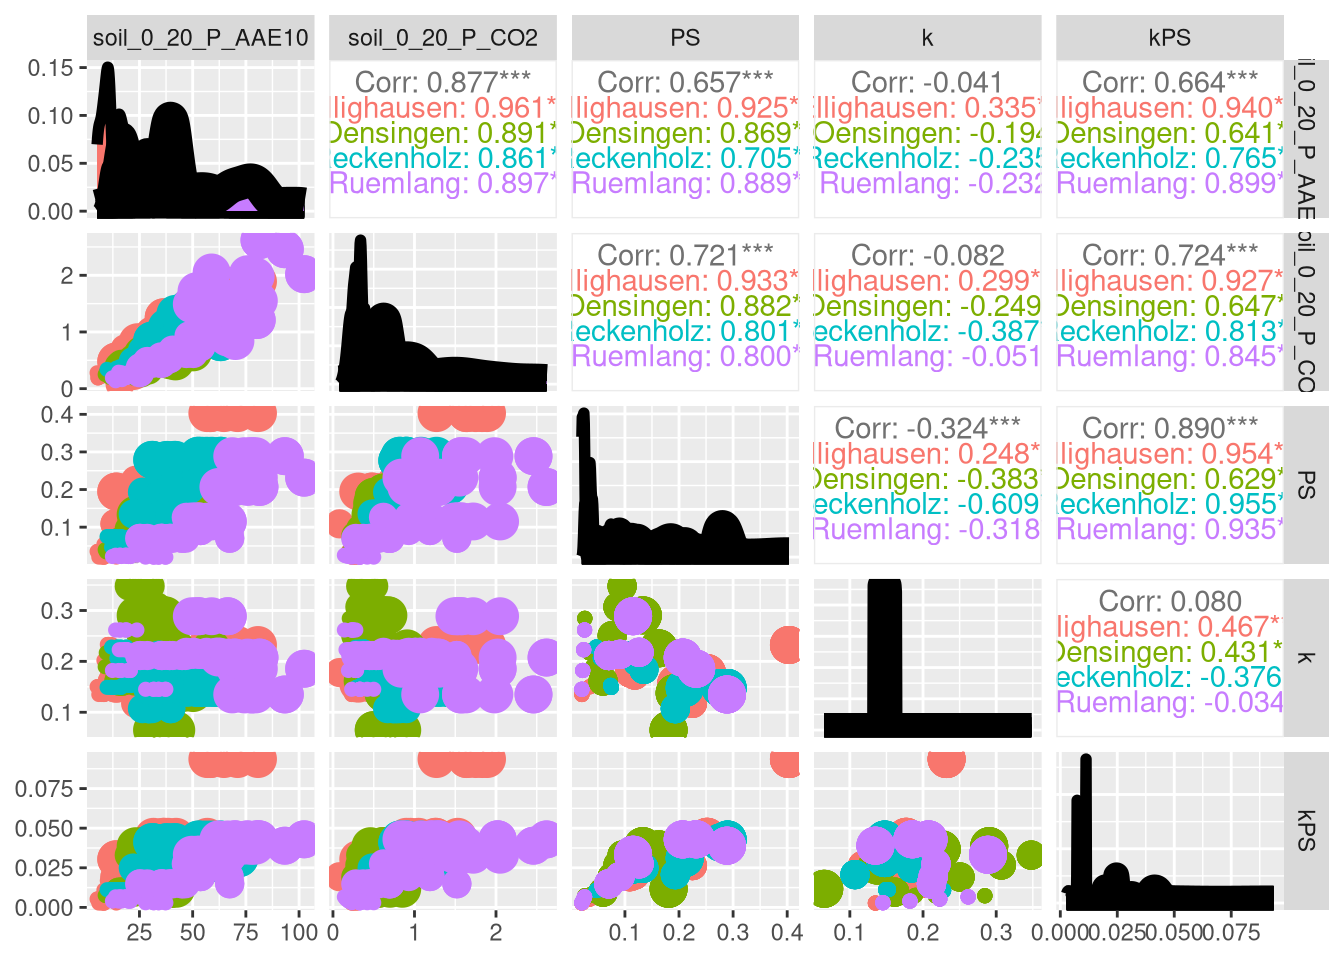

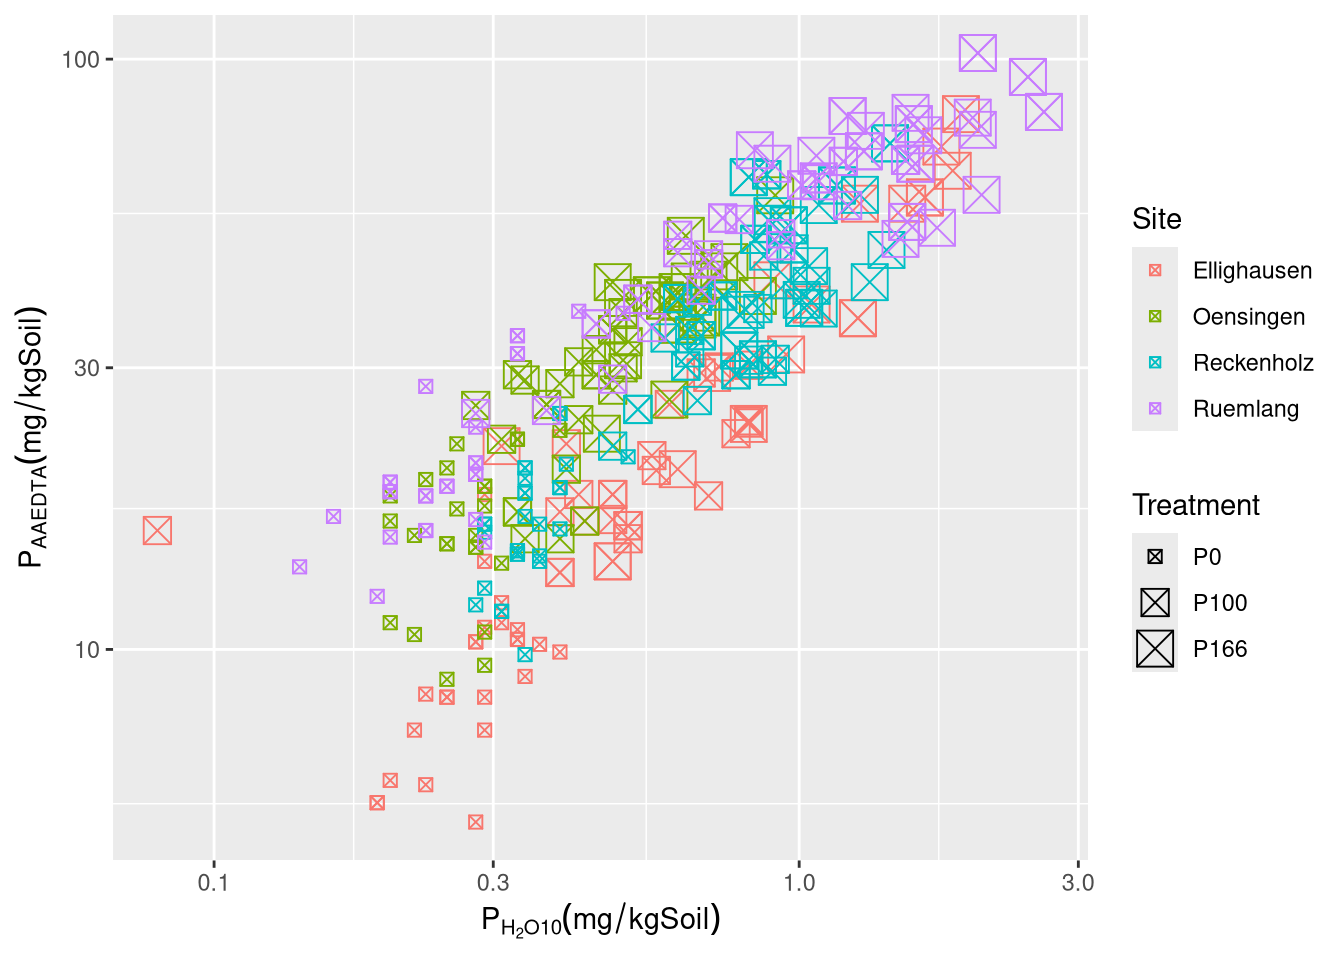

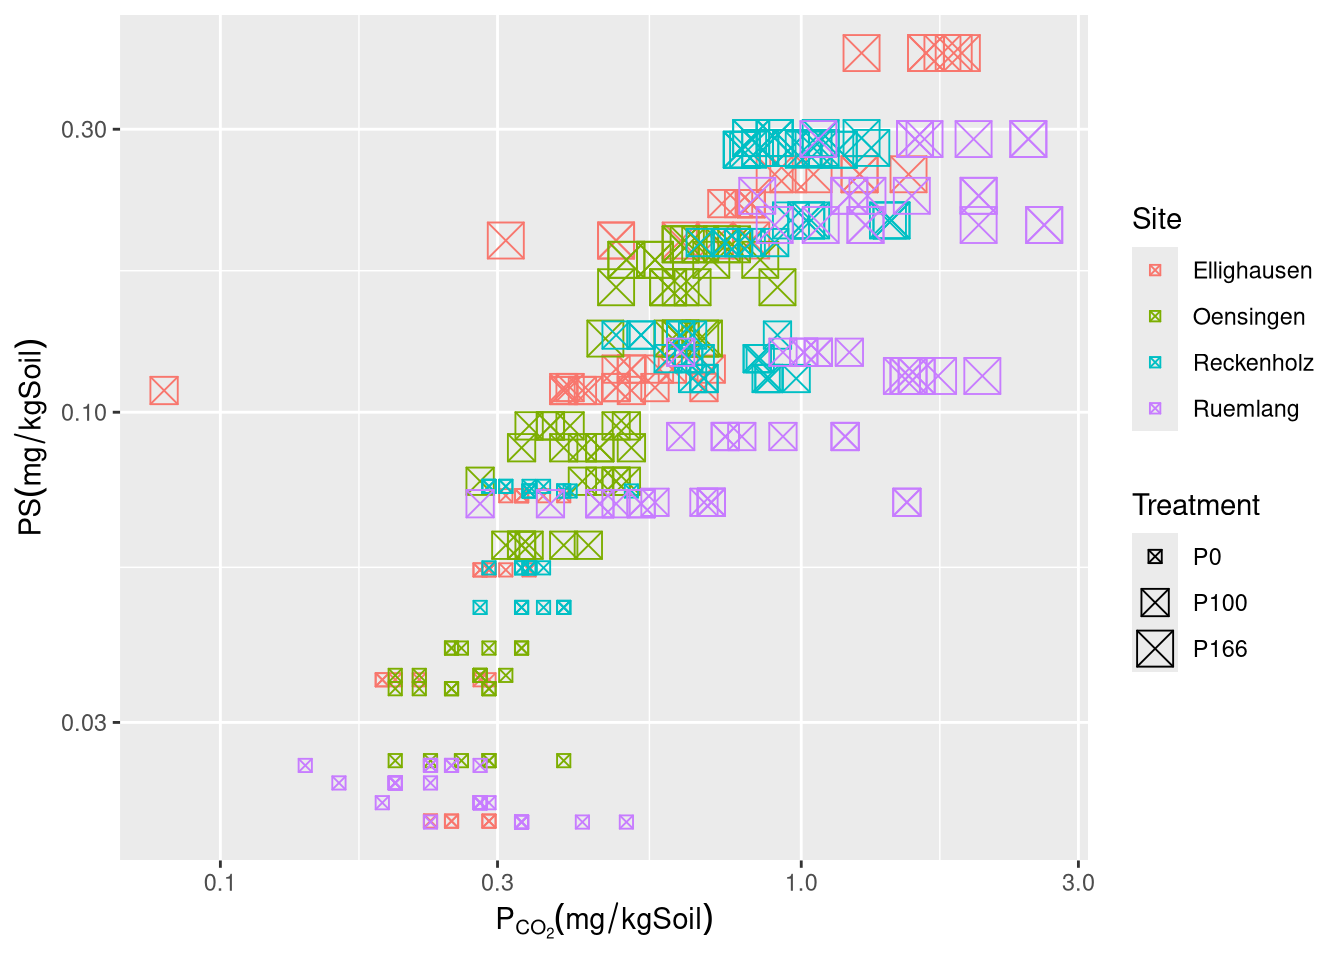

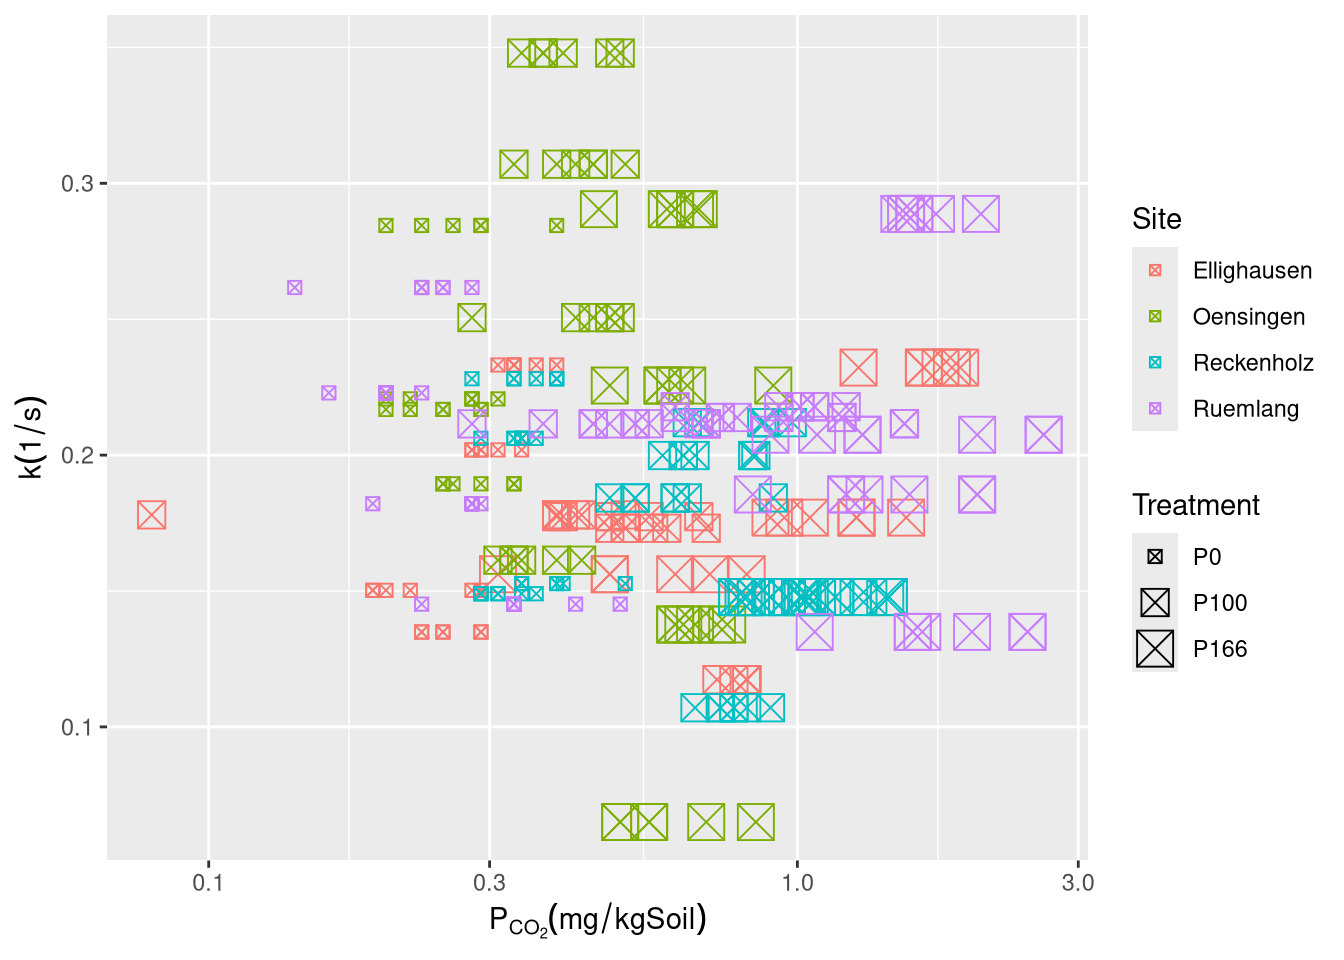

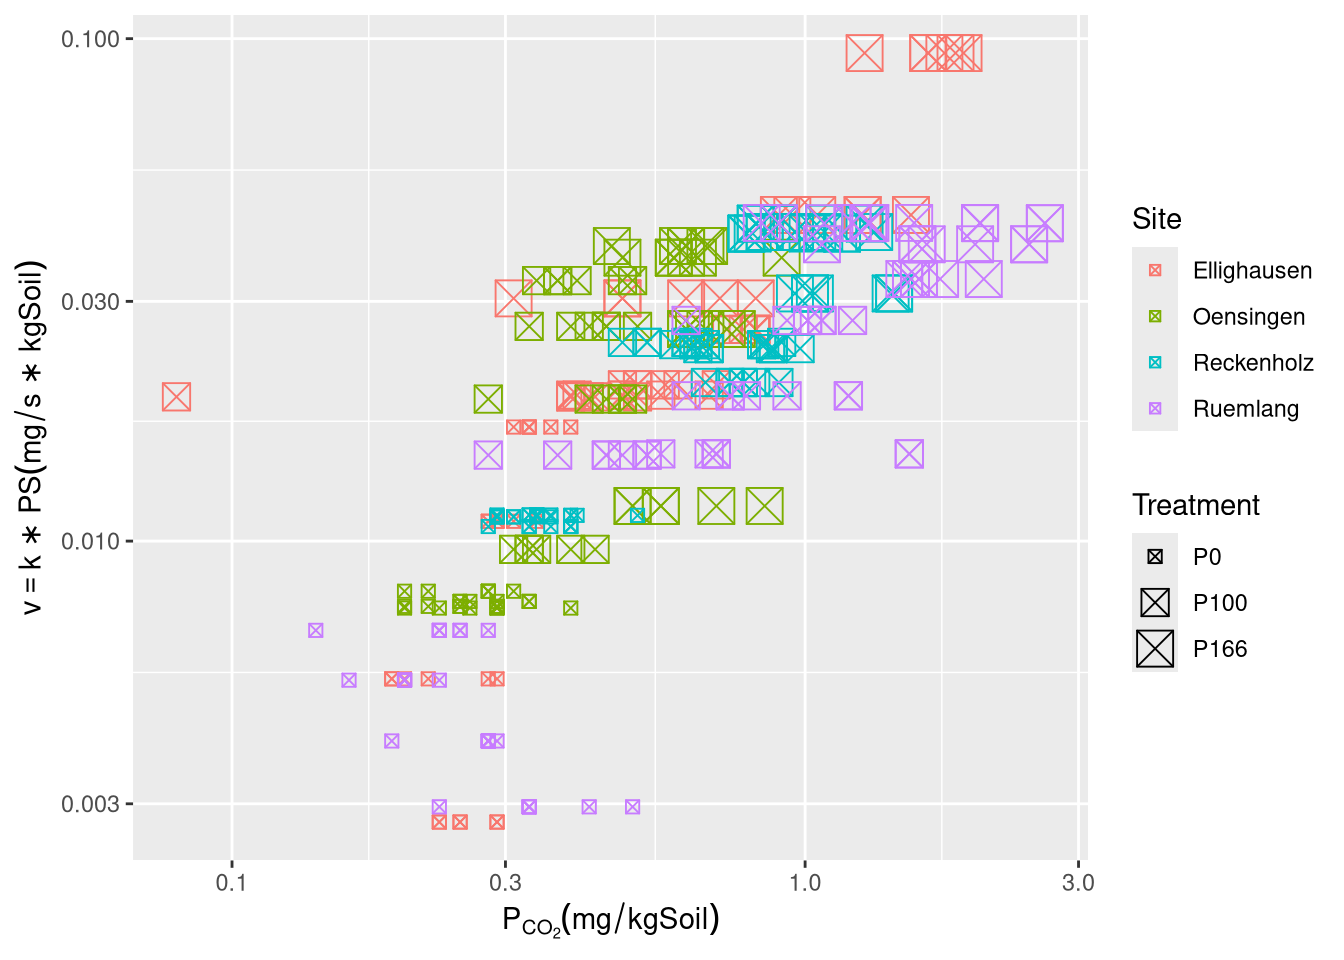

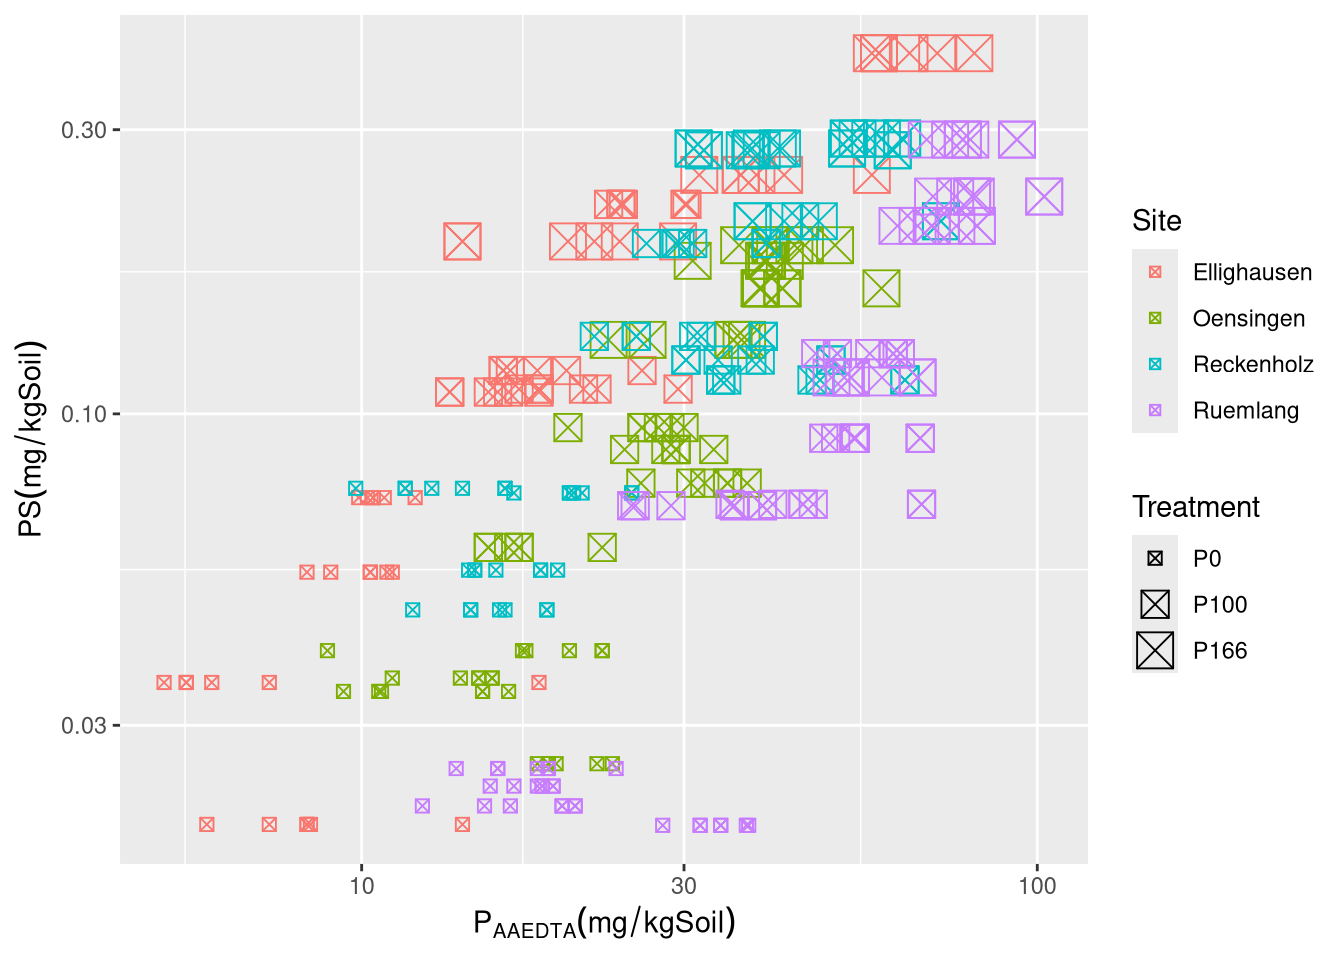

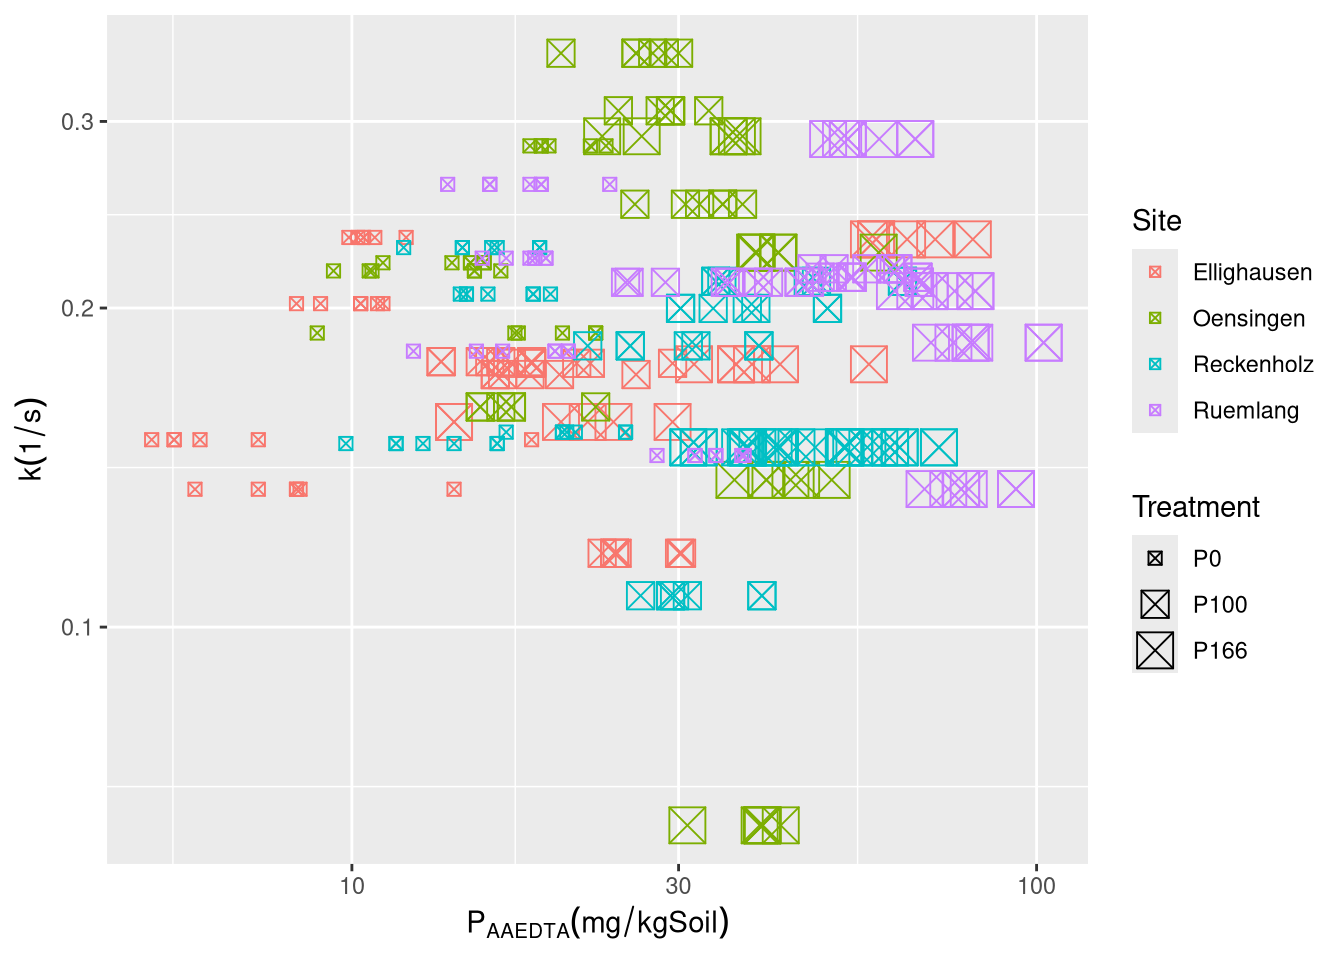

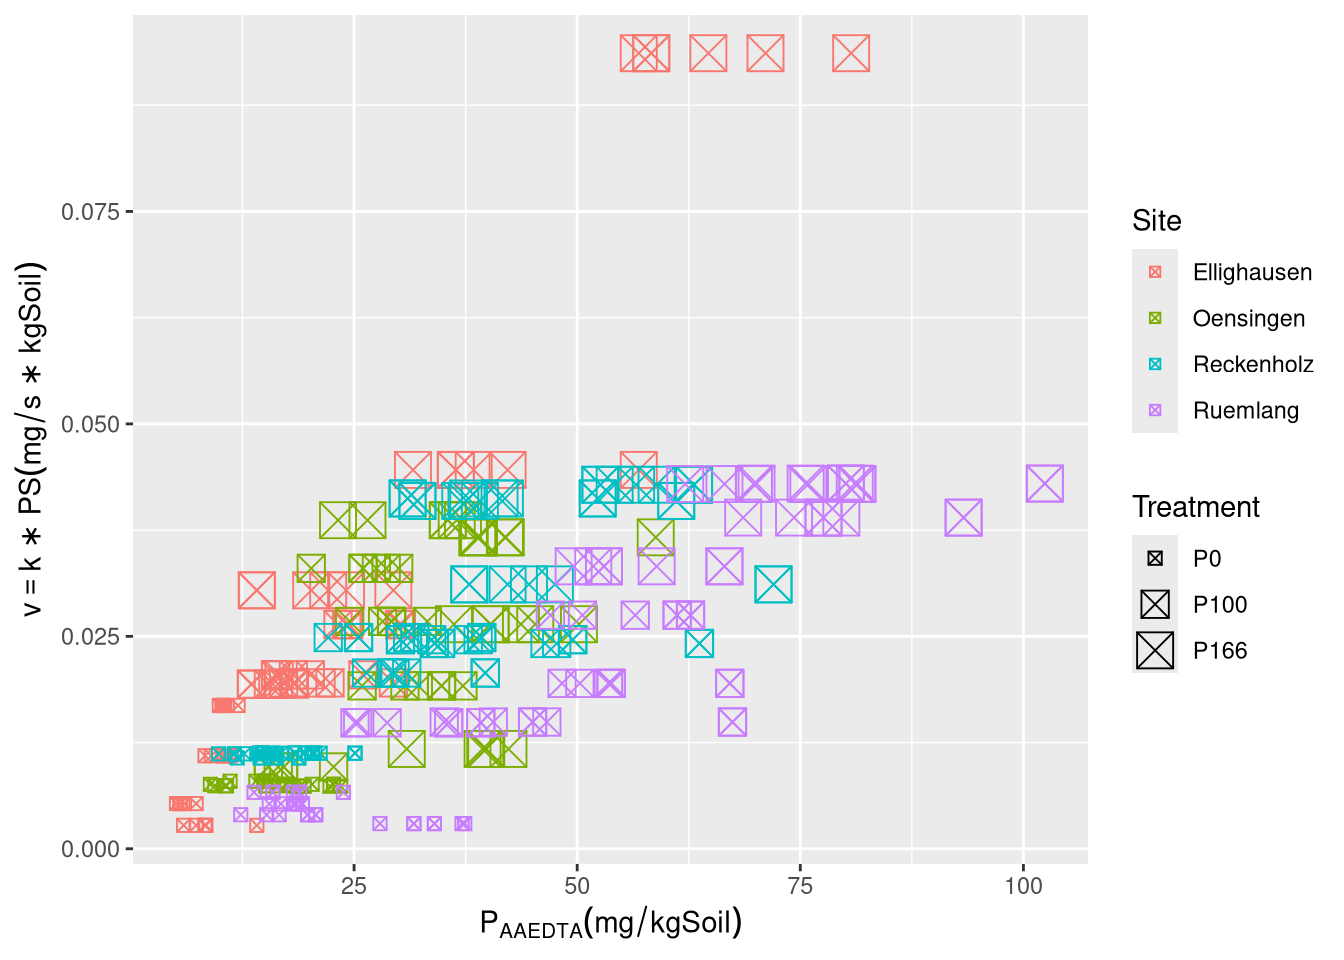

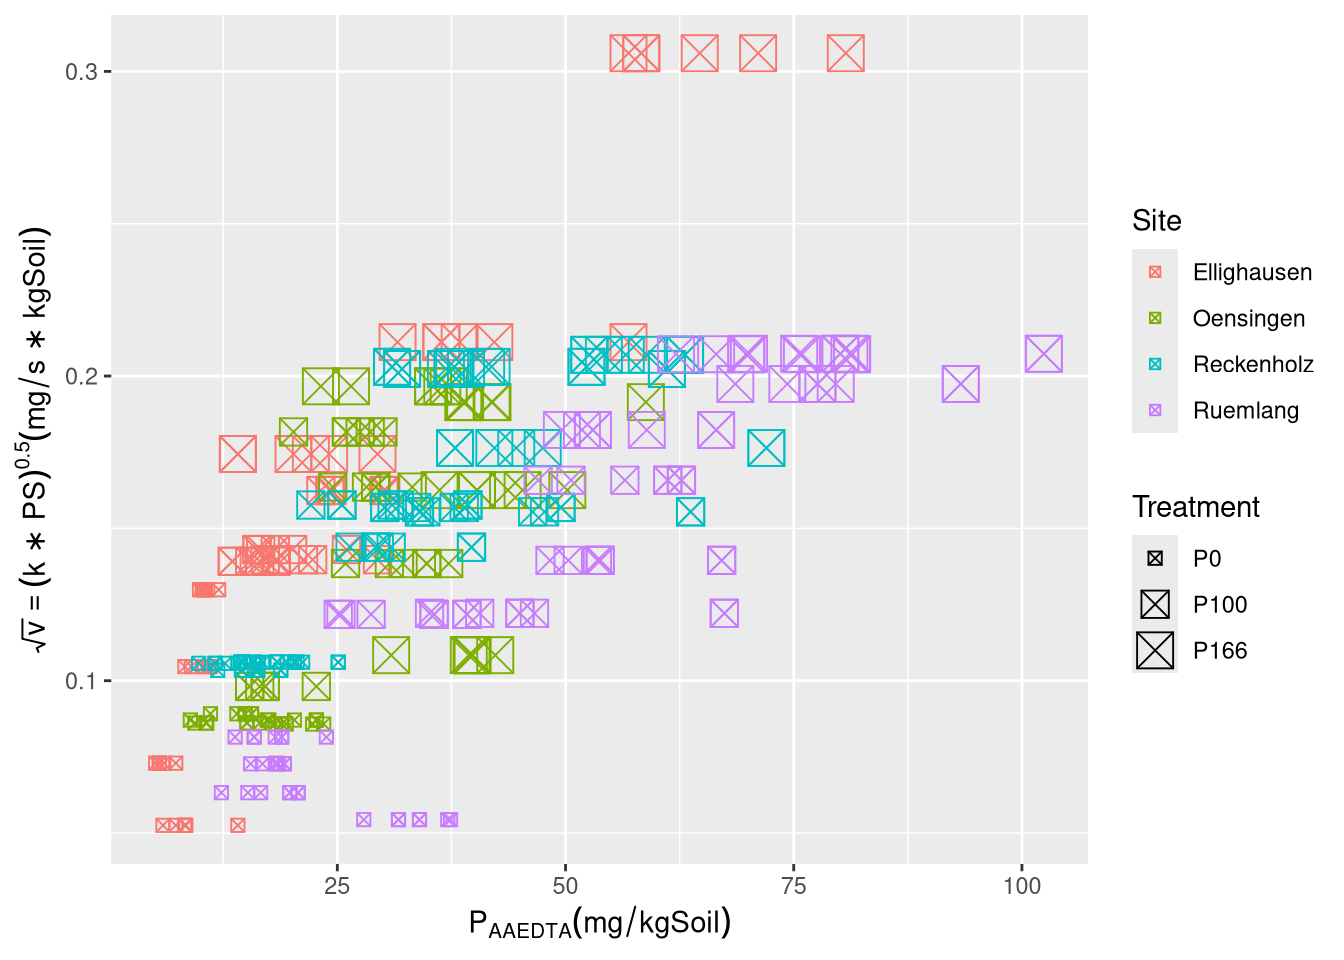

In [ ]:

library(GGally)


Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

In [ ]:
# Wovon hängen Modelparameter ab?

library(lmerTest)



Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0733  0.0733     1 71.083   2.414 0.1246933    
soil_0_20_pH_H2O 0.0281  0.0281     1 88.990   0.925 0.3387645    
soil_0_20_Corg   0.4583  0.4583     1 64.437  15.098 0.0002435 ***
soil_0_20_silt   0.1133  0.1133     1 72.620   3.734 0.0572161 .  
Treatment        9.8709  4.9355     2  6.049 162.603 5.518e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0072526 0.0072526     1 69.076  6.5714 0.012543 * 
soil_0_20_pH_H2O 0.0033814 0.0033814     1 69.607  3.0638 0.084459 . 
soil_0_20_Corg   0.0000390 0.0000390     1 78.802  0.0353 0.851392   
soil_0_20_silt   0.0118739 0.0118739     1 57.154 10.7588 0.001771 **
Treatment        0.0050579 0.0025290     2  5.561  2.2915 0.187992   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + Treatment + (1 | year) + (1 | Site) + (1 | 
    Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)   
(Intercept) == 0      -0.014335   0.129229  -0.111   1.0000   
soil_0_20_clay == 0   -0.005030   0.001962  -2.563   0.0625 . 
soil_0_20_pH_H2O == 0  0.017903   0.010228   1.750   0.3804   
soil_0_20_Corg == 0   -0.005348   0.028452  -0.188   1.0000   
soil_0_20_silt == 0    0.007694   0.002346   3.280    <0.01 **
TreatmentP100 == 0     0.001212   0.015473   0.078   1.0000   
TreatmentP166 == 0    -0.028389   0.015664  -1.812   0.3412   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0029 0.00289     1 58.281  0.0543 0.8166206    
soil_0_20_pH_H2O 0.0737 0.07367     1 87.002  1.3844 0.2425597    
soil_0_20_Corg   0.0465 0.04648     1 88.391  0.8736 0.3525121    
soil_0_20_silt   0.0181 0.01814     1 52.468  0.3409 0.5618166    
Treatment        4.3387 2.16933     2  5.838 40.7688 0.0003714 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Treatment + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.298182   1.057421  -5.956   <0.001 ***
soil_0_20_clay == 0   -0.003629   0.015580  -0.233    1.000    
soil_0_20_pH_H2O == 0  0.092659   0.078751   1.177    0.792    
soil_0_20_Corg == 0    0.194969   0.208600   0.935    0.915    
soil_0_20_silt == 0    0.011076   0.018970   0.584    0.991    
TreatmentP100 == 0     1.053124   0.185019   5.692   <0.001 ***
TreatmentP166 == 0     1.658013   0.185905   8.919   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF   DenDF F value Pr(>F)
k         306.01  306.01     1  86.336  1.3218 0.2534
log(PS)    33.66   33.66     1 138.415  0.1454 0.7036
Treatment 415.65  207.82     2   7.379  0.8977 0.4478
k:log(PS) 510.00  510.00     1 104.864  2.2030 0.1407

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k          0.032   0.032     1 295.86  0.0002 0.9877
log(PS)   20.205  20.205     1 295.76  0.1520 0.6969
Treatment 77.719  38.859     2 258.80  0.2924 0.7467
k:log(PS)  0.653   0.653     1 295.07  0.0049 0.9442

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0118 0.01181     1 48.798  0.1428 0.7071250    
soil_0_20_pH_H2O 0.0686 0.06858     1 65.341  0.8297 0.3657041    
soil_0_20_Corg   0.2993 0.29934     1 37.017  3.6216 0.0648334 .  
soil_0_20_silt   0.0665 0.06645     1 22.514  0.8040 0.3793909    
Treatment        4.8977 2.44886     2  5.827 29.6281 0.0008839 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0491  0.0491     1 58.650  1.1361 0.2908517    
soil_0_20_pH_H2O 0.2473  0.2473     1 75.287  5.7214 0.0192552 *  
soil_0_20_Corg   0.2830  0.2830     1 45.764  6.5490 0.0138669 *  
soil_0_20_silt   0.0572  0.0572     1 87.560  1.3231 0.2531704    
Treatment        7.5352  3.7676     2  4.841 87.1720 0.0001598 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Since we now model two measurement methods, we do not expect correlations by Site/year/etc

boundary (singular) fit: see help('isSingular')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   18.50   17.75   26.37   85.57 

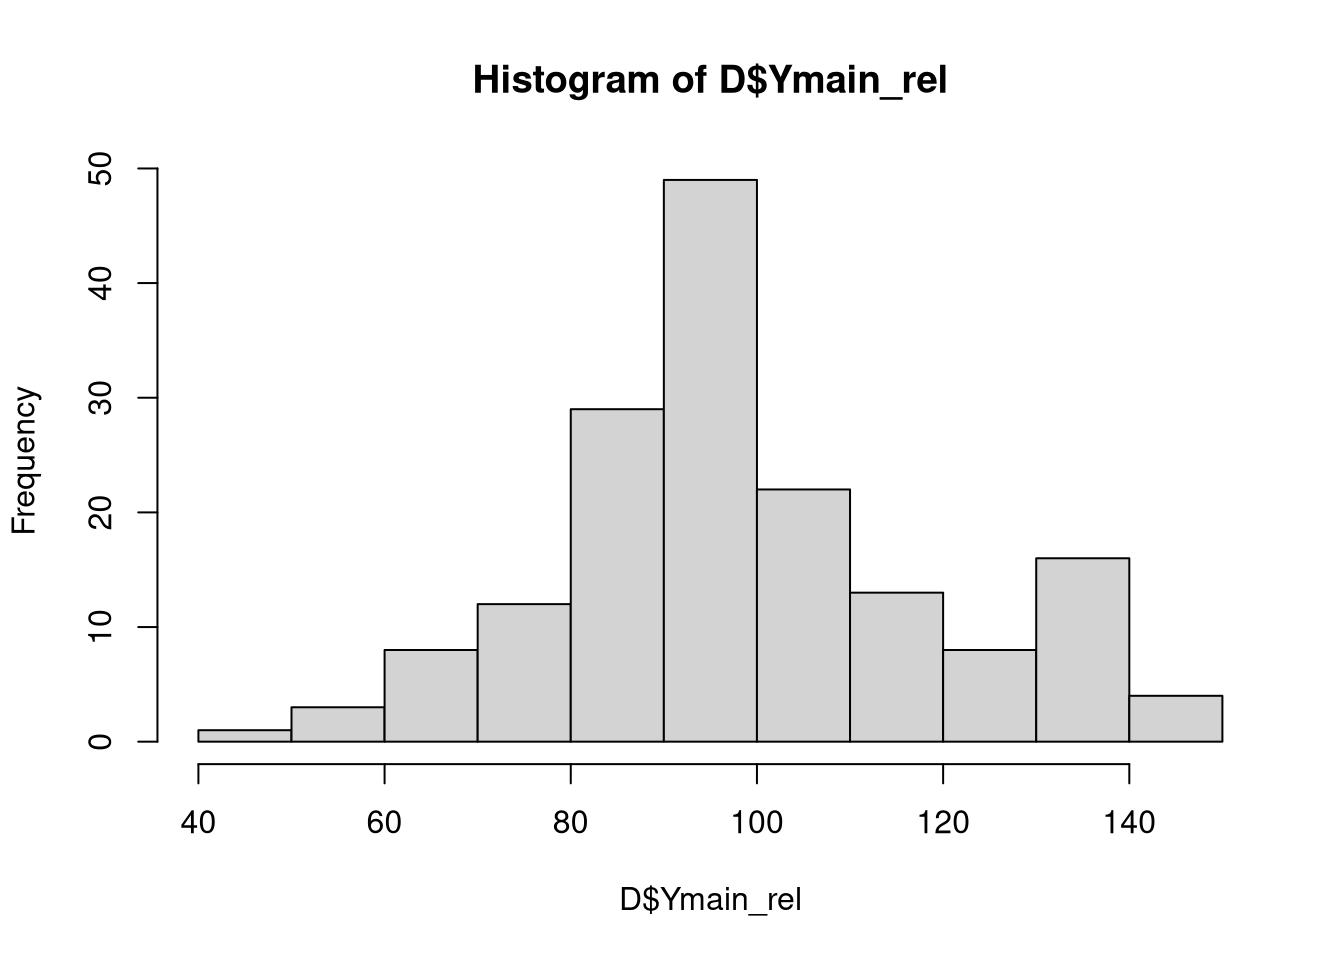

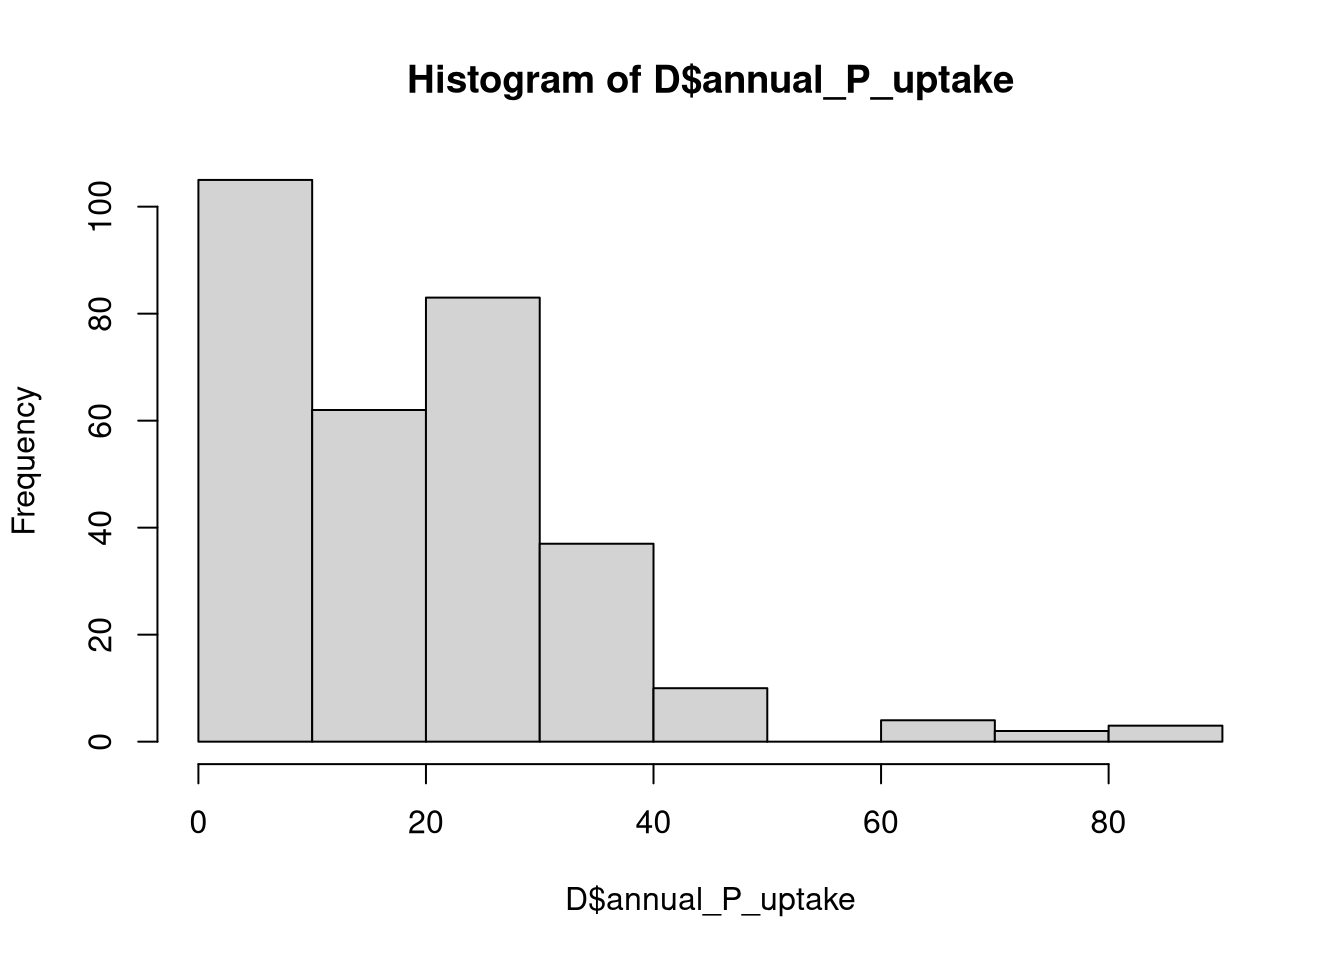


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -1.30117    0.31658  -4.110   <0.001 ***
log(soil_0_20_P_CO2) == 0    1.12550    0.08043  13.993   <0.001 ***
log(soil_0_20_P_AAE10) == 0 -0.11616    0.08195  -1.417    0.225    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.062140   0.035072   1.772    0.116    
log(soil_0_20_P_CO2) == 0   -0.038454   0.008911  -4.315   <0.001 ***
log(soil_0_20_P_AAE10) == 0  0.032612   0.009079   3.592   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -3.59605    0.31916 -11.267   <1e-04 ***
log(soil_0_20_P_CO2) == 0    0.93746    0.08109  11.561   <1e-04 ***
log(soil_0_20_P_AAE10) == 0  0.03412    0.08262   0.413    0.836    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Ymain_rel ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1356.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89707 -0.51631 -0.01278  0.59920  2.76693 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 1.088e-06  0.001043
 Site:Treatment (Intercept) 7.770e+00  2.787480
 Site           (Intercept) 3.888e+01  6.235037
 year           (Intercept) 2.299e+02 15.163045
 Residual                   2.235e+02 14.950651
Number of obs: 165, groups:  
Site:block, 16; Site:Treatment, 12; Site, 4; year, 4

Fixed effects:
                       Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)              78.918     20.173 58.997   3.912 0.000239 ***
log(soil_0_20_P_CO2)      5.289      4.490 94.580   

In [ ]:
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)
